# Kaggle Tunnel Data

Develop a Linear Regression model for Time Series Forecast over the tunnel dataset.

# Setup Notebook

## Import

In [10]:
# Import Standard Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier

# Import Package Modules
from src.general_utils.general_utils import read_configuration, read_data_from_config

## Plot Configurations

In [2]:
# Set Matplotlib defaults
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

## Define Configuration

In [3]:
# Retrieve root path
root_path = Path(os.getcwd()).parents[1]

# Read configuration variables
config = read_configuration(root_path / 'configuration' / 'linear_regression_config.yaml')

# Extract configuration variables
tunnel_dataset_config = config['tunnel_dataset_config']

[06/09/2024 20:43:30 - general_utils] INFO - read_configuration - Start
[06/09/2024 20:43:30 - general_utils] INFO - read_configuration - Reading /Users/s.porreca/Projects/TimeWarpForecast/configuration/linear_regression_config.yaml
[06/09/2024 20:43:30 - general_utils] INFO - read_configuration - Configuration file /Users/s.porreca/Projects/TimeWarpForecast/configuration/linear_regression_config.yaml read successfully
[06/09/2024 20:43:30 - general_utils] INFO - read_configuration - End


# Read Data

In [5]:
# Read data
tunnel_dataset = read_data_from_config(tunnel_dataset_config)

[06/07/2024 15:50:52 - general_utils] INFO - read_data_from_config - Start
[06/07/2024 15:50:52 - general_utils] INFO - read_data_from_config - Retrieve data path
[06/07/2024 15:50:52 - general_utils] INFO - build_path_from_list - Start
[06/07/2024 15:50:52 - general_utils] INFO - build_path_from_list - Retrieve root path to the project folder
[06/07/2024 15:50:52 - general_utils] INFO - build_path_from_list - Build the absolute path
[06/07/2024 15:50:52 - general_utils] INFO - build_path_from_list - End
[06/07/2024 15:50:52 - general_utils] INFO - read_data_from_config - Retrieved data path /Users/s.porreca/Projects/TimeWarpForecast/data/raw/tunnel.csv
[06/07/2024 15:50:52 - general_utils] INFO - read_data_from_config - Reading data
[06/07/2024 15:50:52 - general_utils] INFO - read_data_from_config - Successfully read data with 747 rows and 2 columns
[06/07/2024 15:50:52 - general_utils] INFO - read_data_from_config - End


# Model Time-step Based

## Data Preparation

### Time-step Feature

Time-step features are features we can derive directly from the time index. 
The most basic time-step feature is the **Time Dummy**, which counts off time steps in the series from beginning to end.

In [6]:
# Add the time-step feature
tunnel_dataset['Time'] = np.arange(len(tunnel_dataset))

In [7]:
tunnel_dataset

,Day,NumVehicles,Time
0,2003-11-01,103536,0
1,2003-11-02,92051,1
2,2003-11-03,100795,2
3,2003-11-04,102352,3
4,2003-11-05,106569,4
...,...,...,...
742,2005-11-12,104646,742
743,2005-11-13,94424,743
744,2005-11-14,112165,744
745,2005-11-15,114296,745


### Define Features & Labels

In [8]:
X = tunnel_dataset.loc[:, ['Time']]  # features
y = tunnel_dataset.loc[:, 'NumVehicles']  # target

## Model Training

In [9]:
# Train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

## Inference

In [10]:
# Compute predictions
y_pred = pd.Series(model.predict(X), index=X.index)

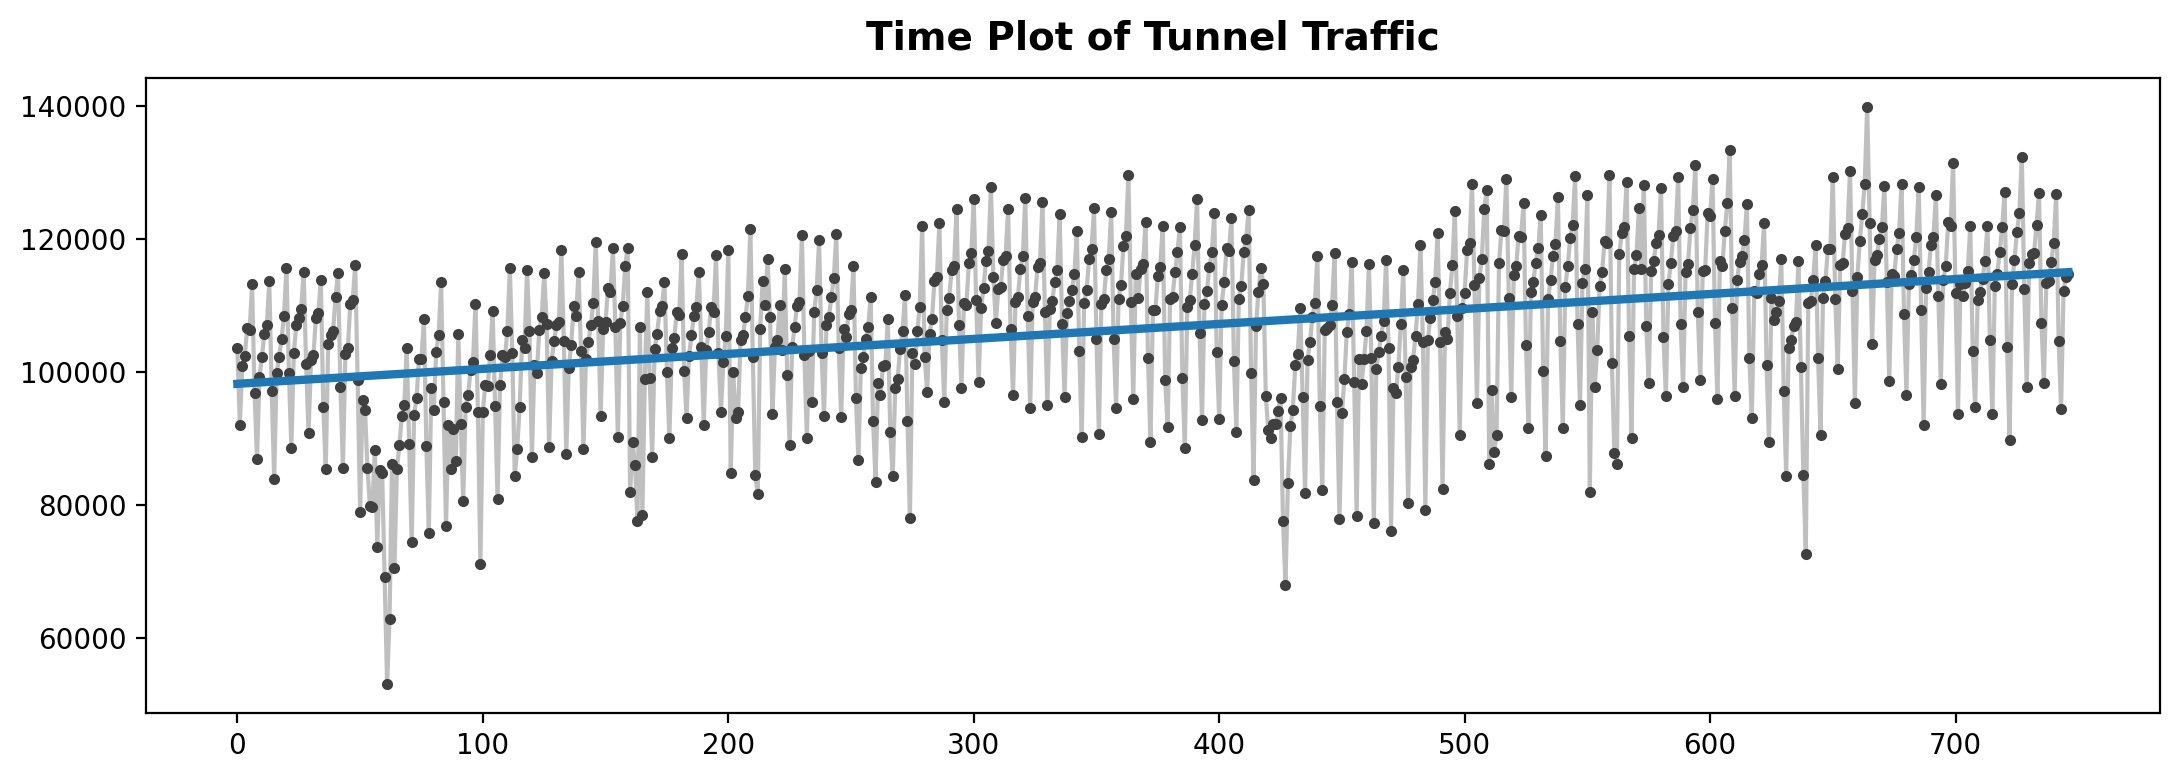

In [11]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

# Model Lag Feature Based

## Data Preparation

### Lag Feature

In [12]:
# Add lag feature
tunnel_dataset['Lag_1'] = tunnel_dataset['NumVehicles'].shift(1)
tunnel_dataset.head()

,Day,NumVehicles,Time,Lag_1
0,2003-11-01,103536,0,NaN
1,2003-11-02,92051,1,103536.0
2,2003-11-03,100795,2,92051.0
3,2003-11-04,102352,3,100795.0
4,2003-11-05,106569,4,102352.0


### Define Features & Labels

In [13]:
# Use the `Lag_1` as feature
X = tunnel_dataset.loc[:, ['Lag_1']]

# Drop missing values
X.dropna(inplace=True)

# Create target
y = tunnel_dataset.loc[:, 'NumVehicles']

# Drop missing X values in y
y, X = y.align(X, join='inner')

## Model Training

In [14]:
# Fit model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

## Inference

In [15]:
# Compute predictions
y_pred = pd.Series(model.predict(X), index=X.index)

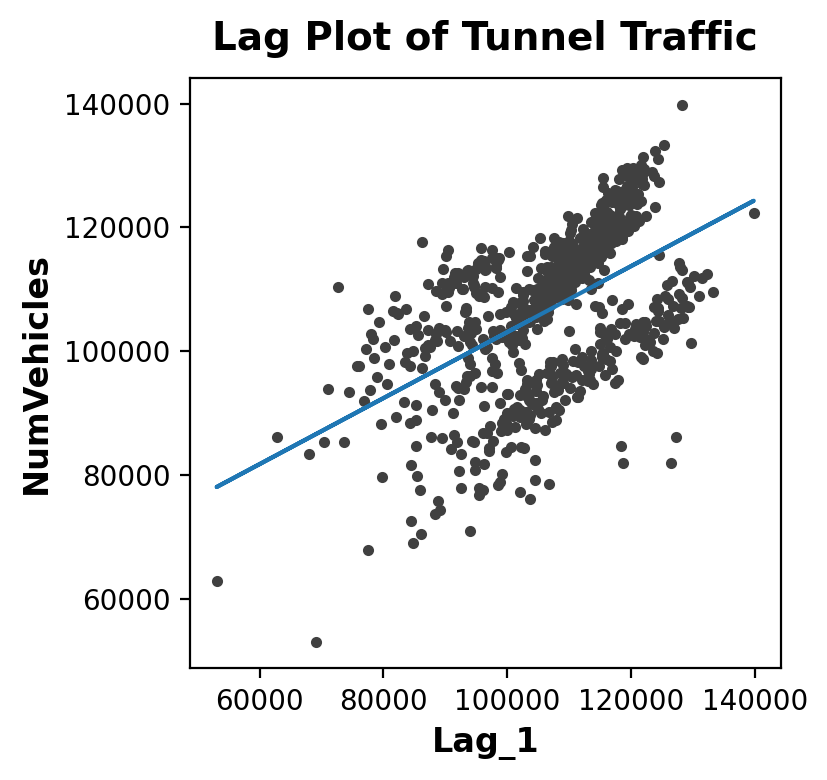

In [16]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

# Moving Average

The Moving Average plot helps to identify the kind of the trend the time series might have.
It is plotted by computing the average of the values of the time series within a sliding window of some pre-defined length.
It helps to overcome short-term seasonal changes and uncover the underlying trend pattern. It is used to see a trend without the "noise" added by seasonal changes.

## Read Data

In [43]:
tunnel_dataset = read_data_from_config(tunnel_dataset_config)

[06/07/2024 16:22:39 - general_utils] INFO - read_data_from_config - Start
[06/07/2024 16:22:39 - general_utils] INFO - read_data_from_config - Retrieve data path
[06/07/2024 16:22:39 - general_utils] INFO - build_path_from_list - Start
[06/07/2024 16:22:39 - general_utils] INFO - build_path_from_list - Retrieve root path to the project folder
[06/07/2024 16:22:39 - general_utils] INFO - build_path_from_list - Build the absolute path
[06/07/2024 16:22:39 - general_utils] INFO - build_path_from_list - End
[06/07/2024 16:22:39 - general_utils] INFO - read_data_from_config - Retrieved data path /Users/s.porreca/Projects/TimeWarpForecast/data/raw/tunnel.csv
[06/07/2024 16:22:39 - general_utils] INFO - read_data_from_config - Reading data
[06/07/2024 16:22:39 - general_utils] INFO - read_data_from_config - Successfully read data with 747 rows and 2 columns
[06/07/2024 16:22:39 - general_utils] INFO - read_data_from_config - End


## Plot

<Axes: title={'center': 'Tunnel Traffic - 365-Day Moving Average'}, xlabel='Day'>

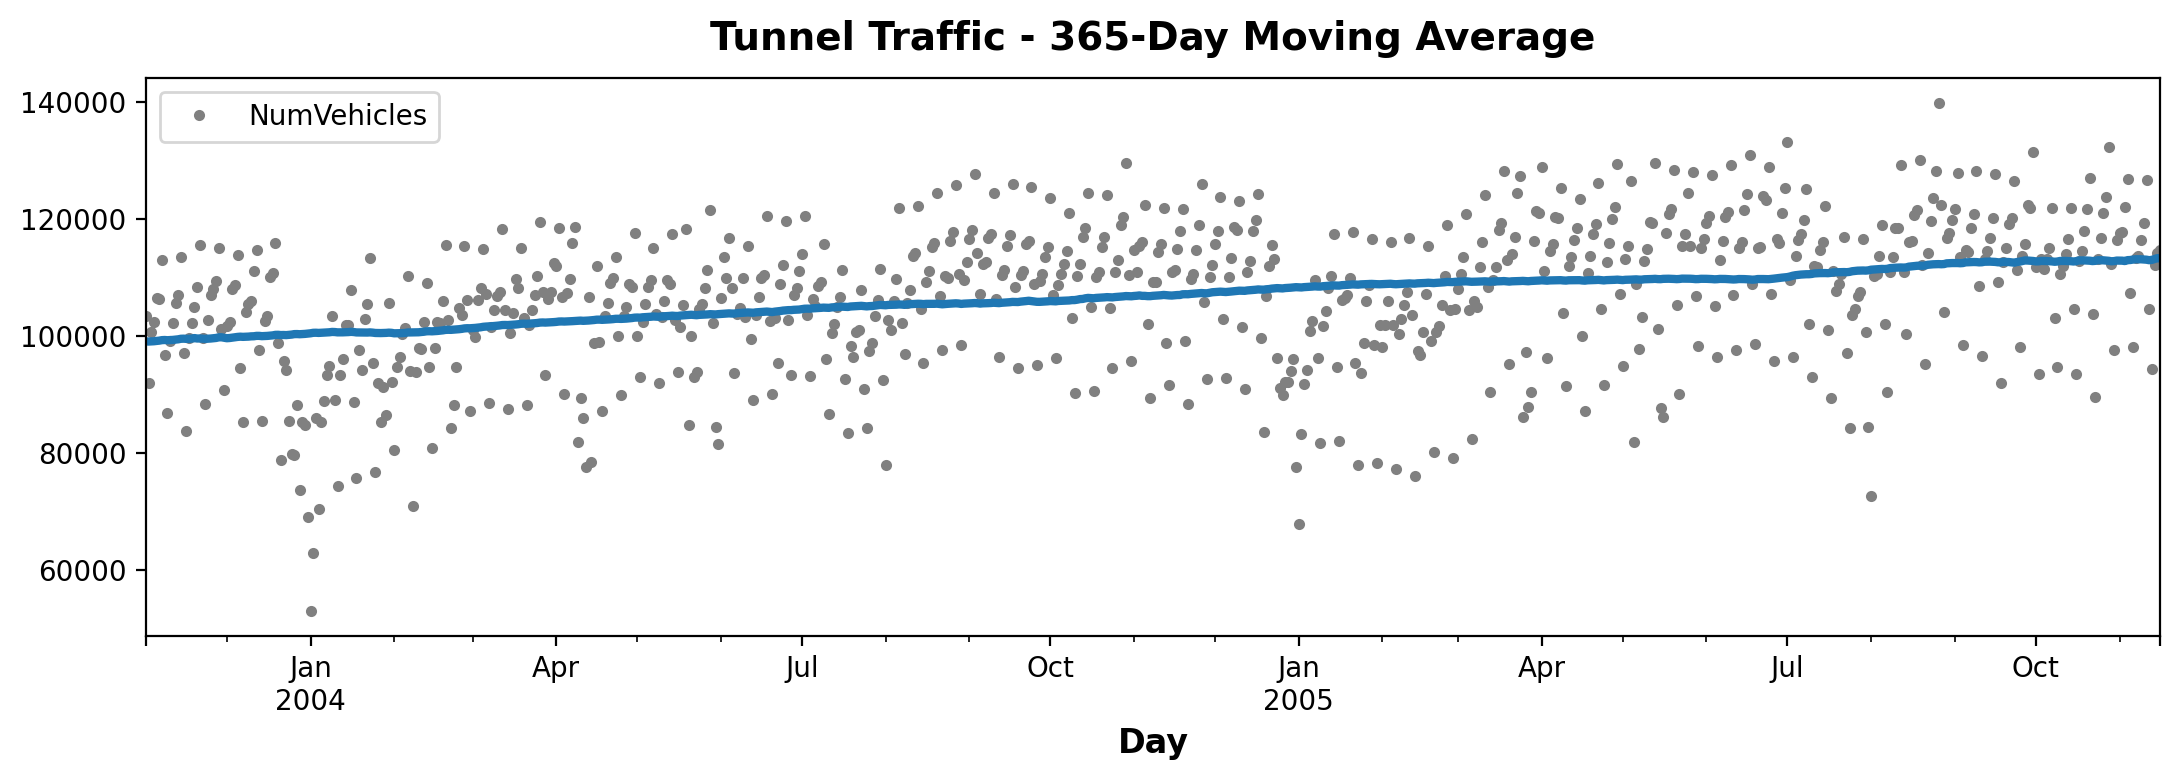

In [44]:
# Compute the moving average over the NumVehicles
tunnel_dataset = tunnel_dataset.set_index('Day').to_period()

moving_average = tunnel_dataset.rolling(
    window=365, # Window size
    center=True, # Place average at the center of the window
    min_periods=183 # Starting and ending window size
).mean()

# Plot data points
ax = tunnel_dataset.plot(style=".", color="0.5")

# Plot the moving average line
moving_average.plot(
    ax=ax, linewidth=3, title="Tunnel Traffic - 365-Day Moving Average", legend=False,
)

## Feature Engineering

Built a time-step dummy engineered feature with `DeterministicProcess`

In [45]:
# Define the deterministic process
deterministic_process = DeterministicProcess(
    index=tunnel_dataset.index, # Use the Day feature
    constant=True, # Bias (y_intercept) -> False if order > 1
    order=1, # Polynomial order -> The moving average plot showed a linear trend -> Greater the order, better it would fit the curve
    drop=True, # Drop terms if necessary to avoid collinearity
)

In [46]:
# Creates features for the dates in the given index argument
X = deterministic_process.in_sample()

## Model Training

In [47]:
# Define target
y = tunnel_dataset['NumVehicles']

# Instance model (Remove intercept since is the same as the 'const' feature)
model = LinearRegression(fit_intercept=False)

# Fit
model.fit(X, y)

# Inference
y_pred = pd.Series(model.predict(X), index=X.index)

<Axes: title={'center': 'Tunnel Traffic - Linear Trend Feature'}, xlabel='Day'>

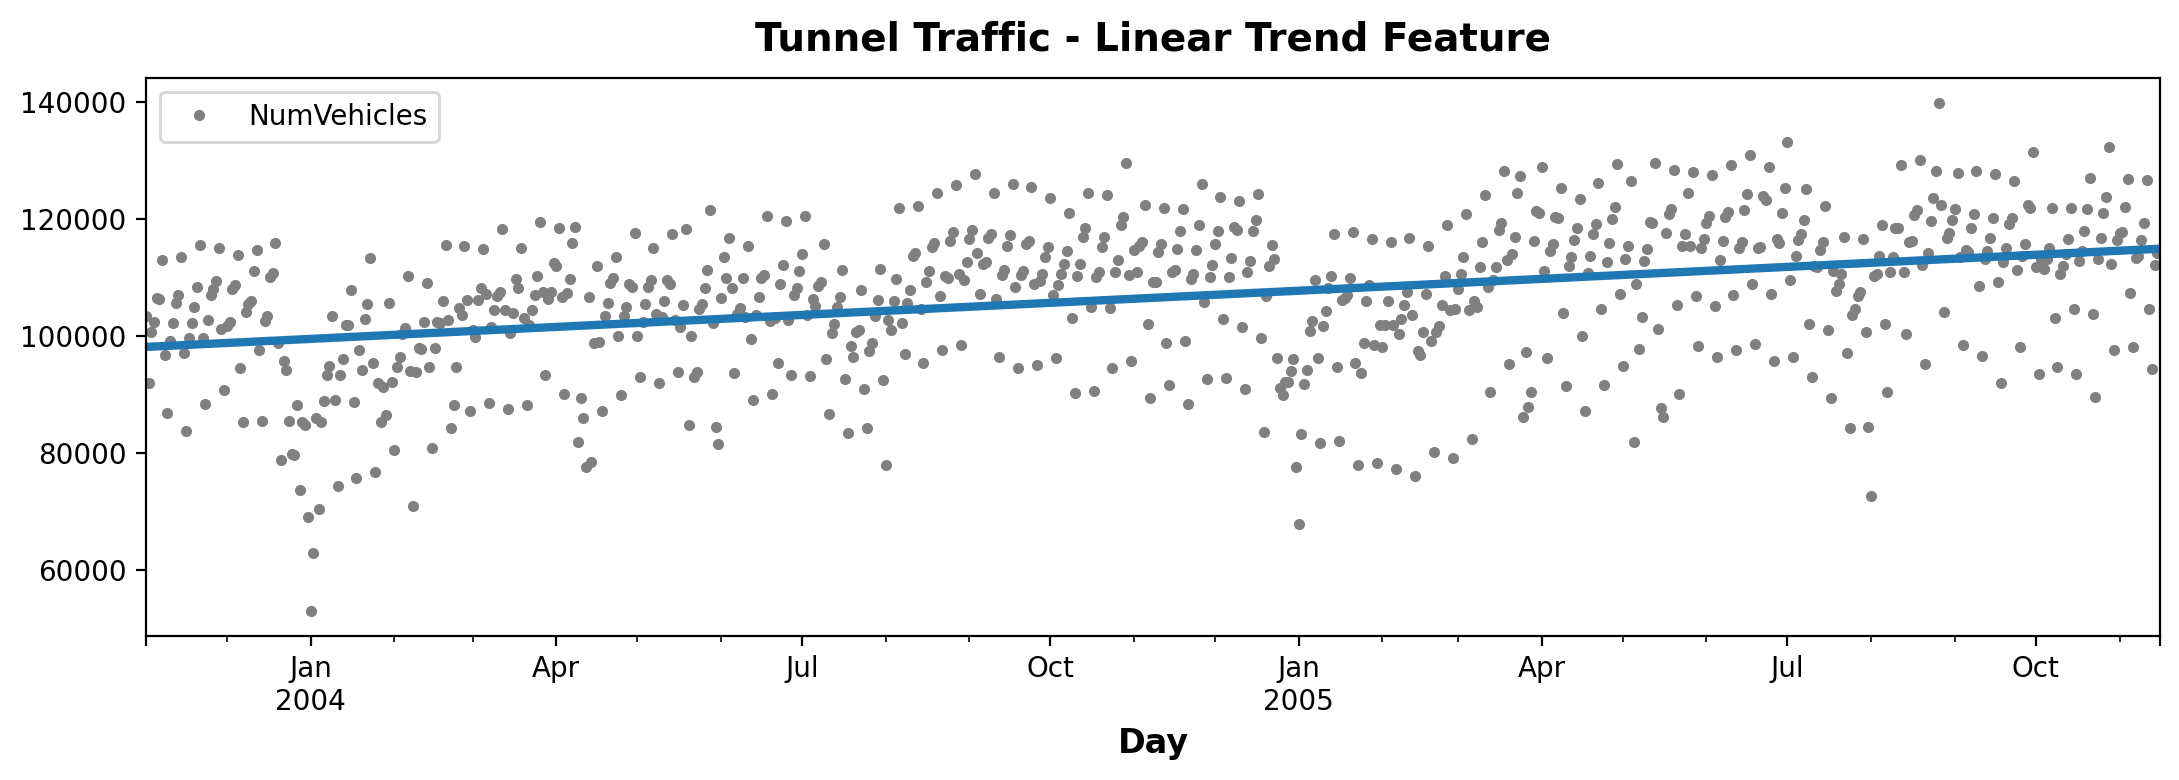

In [48]:
# Plot predictions
ax = tunnel_dataset.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend Feature")
y_pred.plot(ax=ax, linewidth=3, label='Trend')

## Future Predictions

In [49]:
# Compute future dates (30 time steps in the future)
future_steps = deterministic_process.out_of_sample(steps=30)

In [51]:
# Future predictions
y_future = pd.Series(model.predict(future_steps), index=future_steps.index)

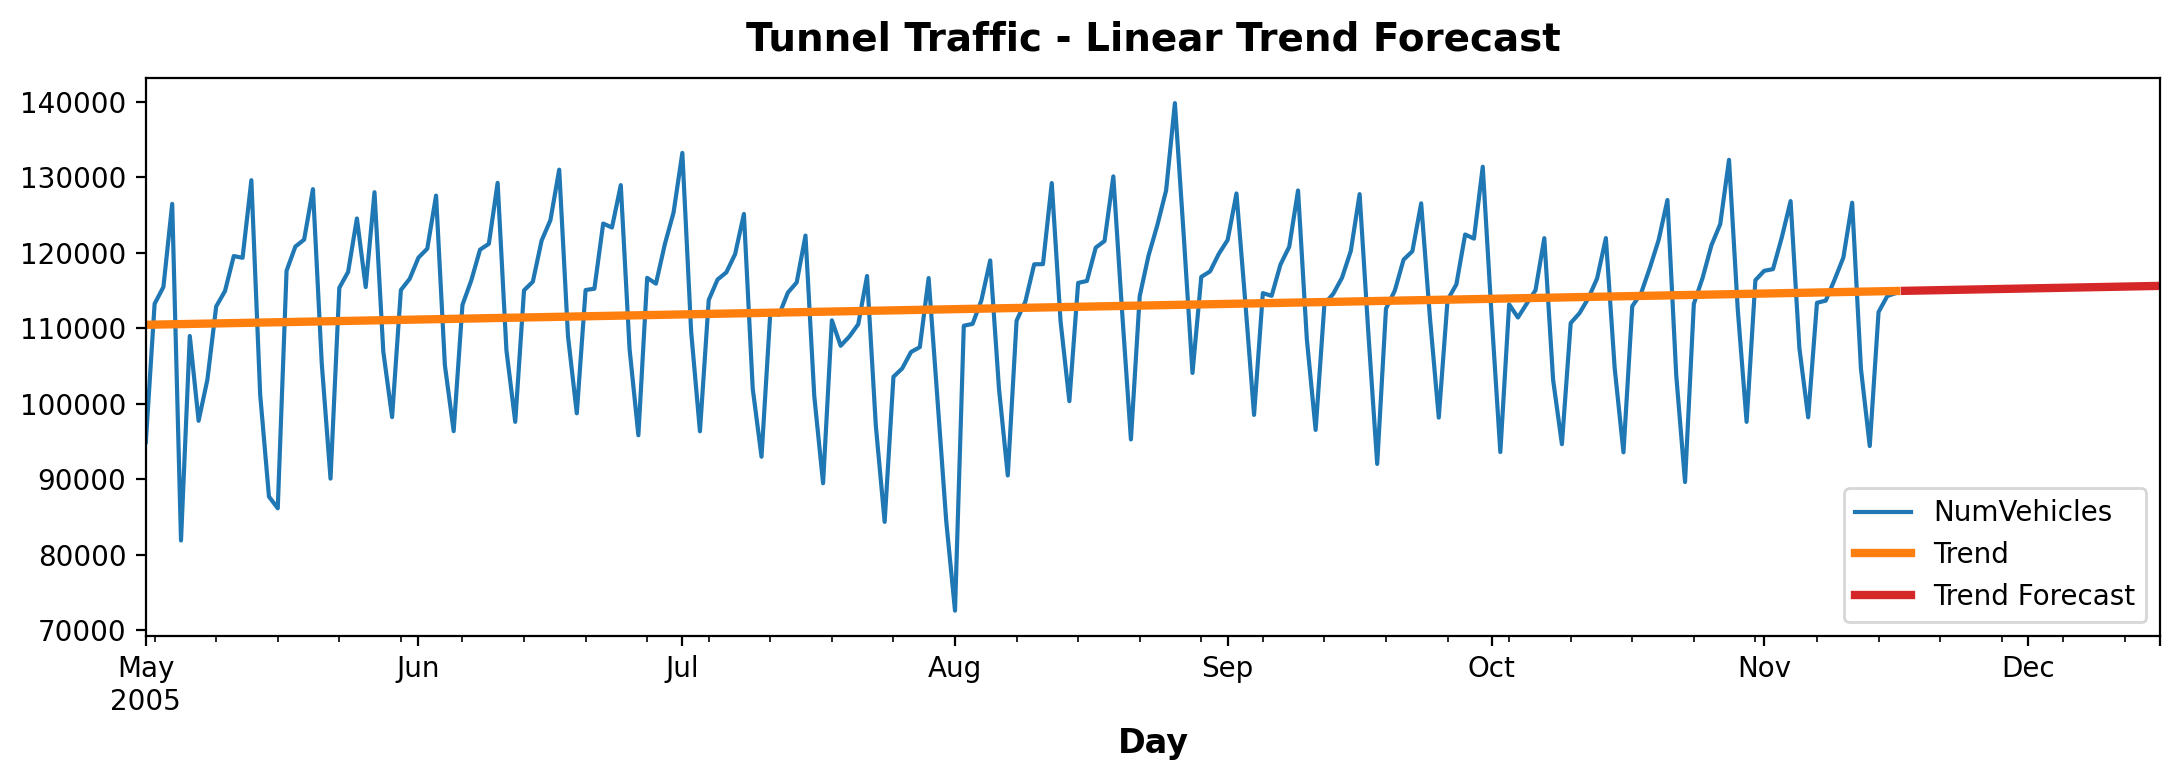

In [53]:
ax = tunnel_dataset["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast")
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_future.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

# Seasonality

In [4]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        errorbar=('ci', False),
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

## Read Data

In [5]:
tunnel_dataset = read_data_from_config(tunnel_dataset_config)

[06/09/2024 20:43:42 - general_utils] INFO - read_data_from_config - Start
[06/09/2024 20:43:42 - general_utils] INFO - read_data_from_config - Retrieve data path
[06/09/2024 20:43:42 - general_utils] INFO - build_path_from_list - Start
[06/09/2024 20:43:42 - general_utils] INFO - build_path_from_list - Retrieve root path to the project folder
[06/09/2024 20:43:42 - general_utils] INFO - build_path_from_list - Build the absolute path
[06/09/2024 20:43:42 - general_utils] INFO - build_path_from_list - End
[06/09/2024 20:43:42 - general_utils] INFO - read_data_from_config - Retrieved data path /Users/s.porreca/Projects/TimeWarpForecast/data/raw/tunnel.csv
[06/09/2024 20:43:42 - general_utils] INFO - read_data_from_config - Reading data
[06/09/2024 20:43:42 - general_utils] INFO - read_data_from_config - Successfully read data with 747 rows and 2 columns
[06/09/2024 20:43:42 - general_utils] INFO - read_data_from_config - End


In [6]:
# Set index
tunnel_dataset = tunnel_dataset.set_index("Day").to_period("D")

## Data Preparation

In [7]:
# Copy
tunnel_copy = tunnel_dataset.copy()

# Compute date attributes
tunnel_copy["day"] = tunnel_copy.index.dayofweek
tunnel_copy["week"] = tunnel_copy.index.week
tunnel_copy["dayofyear"] = tunnel_copy.index.dayofyear
tunnel_copy["year"] = tunnel_copy.index.year

## EDA

### Seasonal Plot

<Axes: title={'center': 'Seasonal Plot (year/dayofyear)'}, xlabel='dayofyear', ylabel='NumVehicles'>

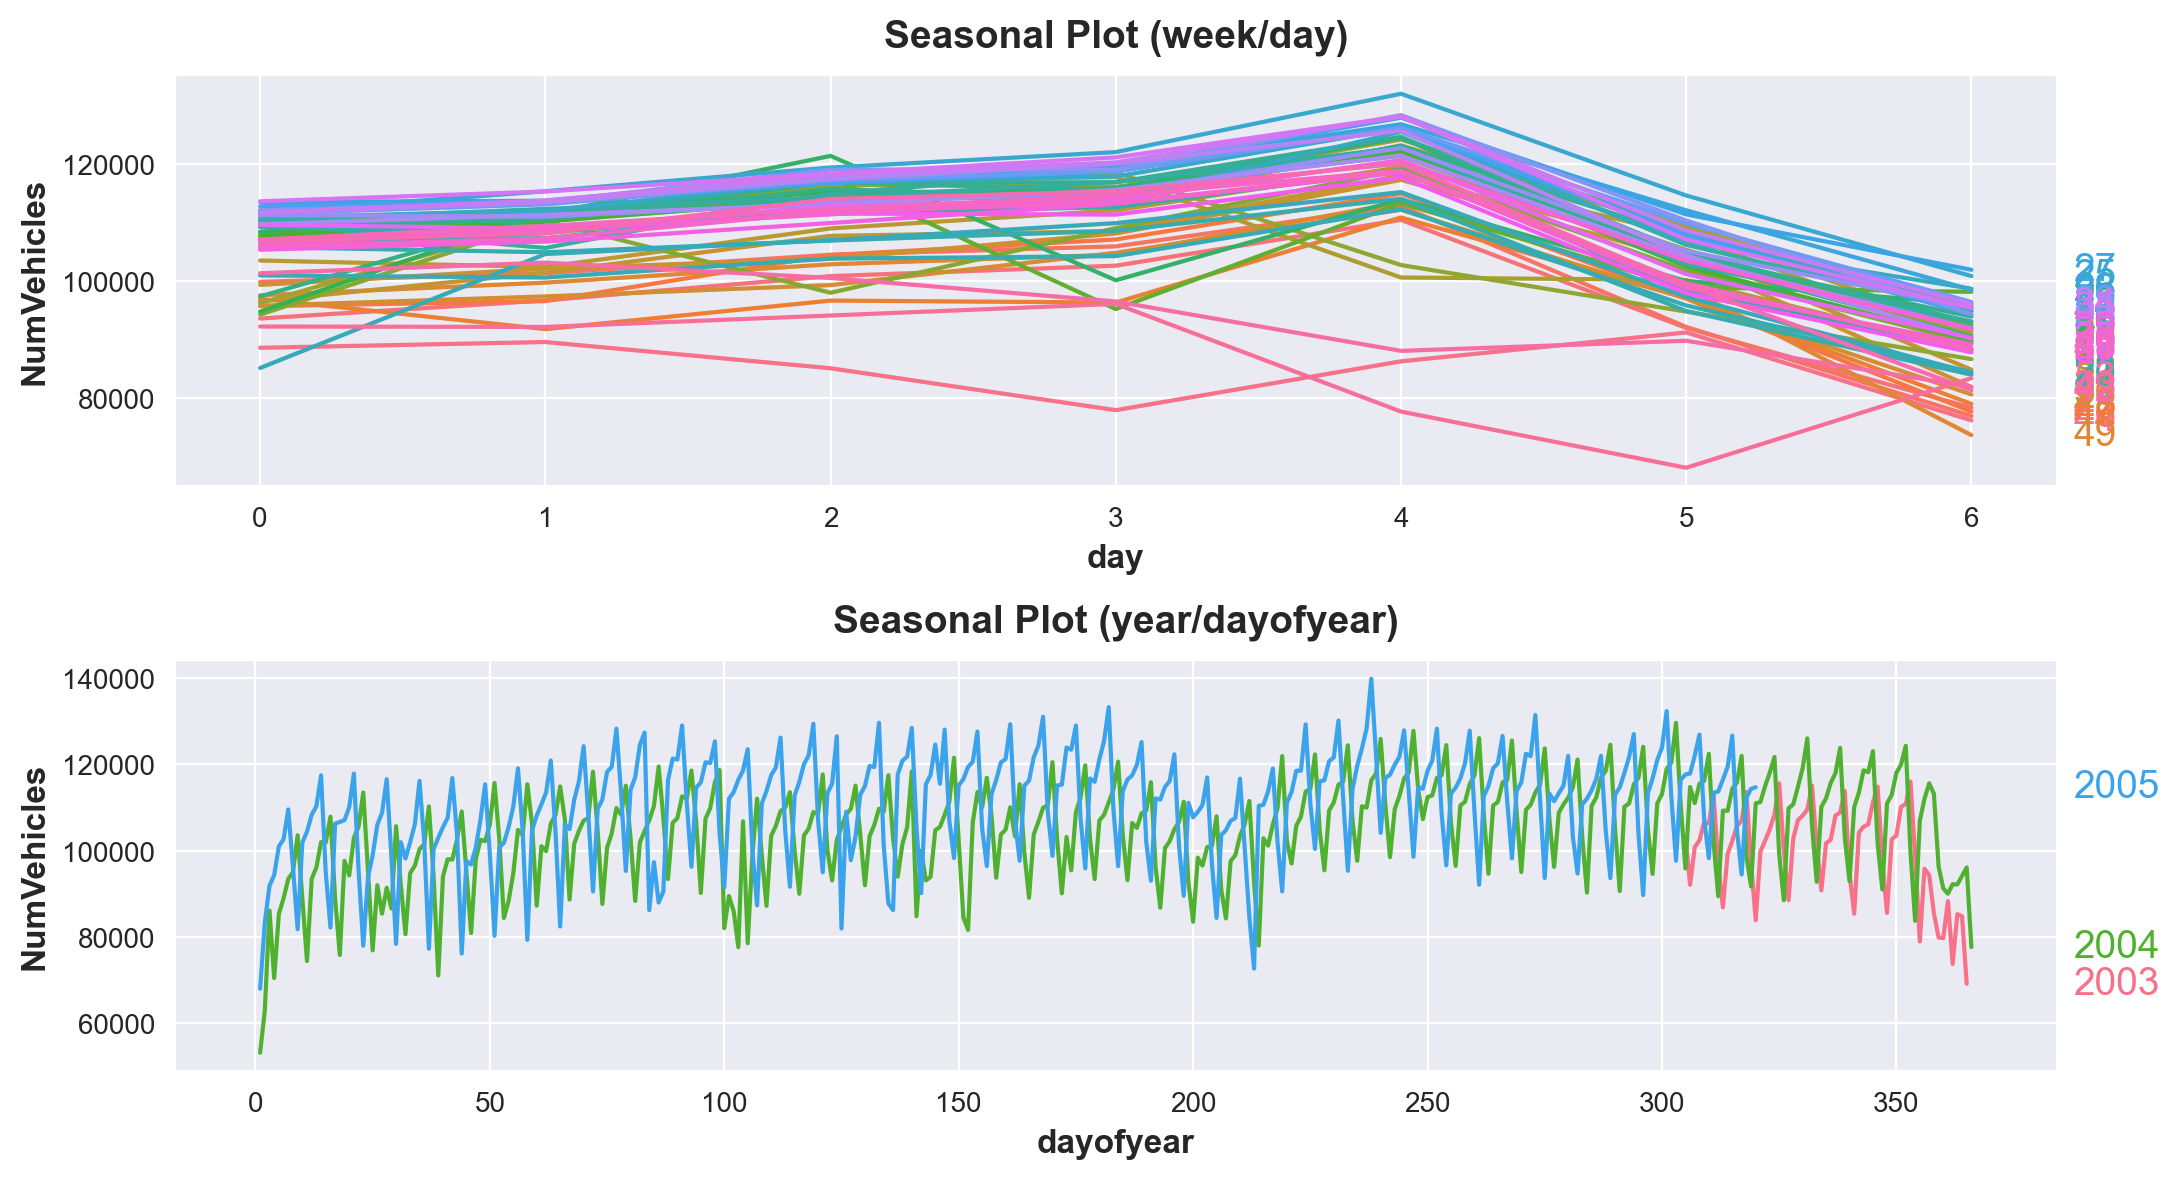

In [8]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(tunnel_copy, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(tunnel_copy, y="NumVehicles", period="year", freq="dayofyear", ax=ax1)

### Periodgram

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

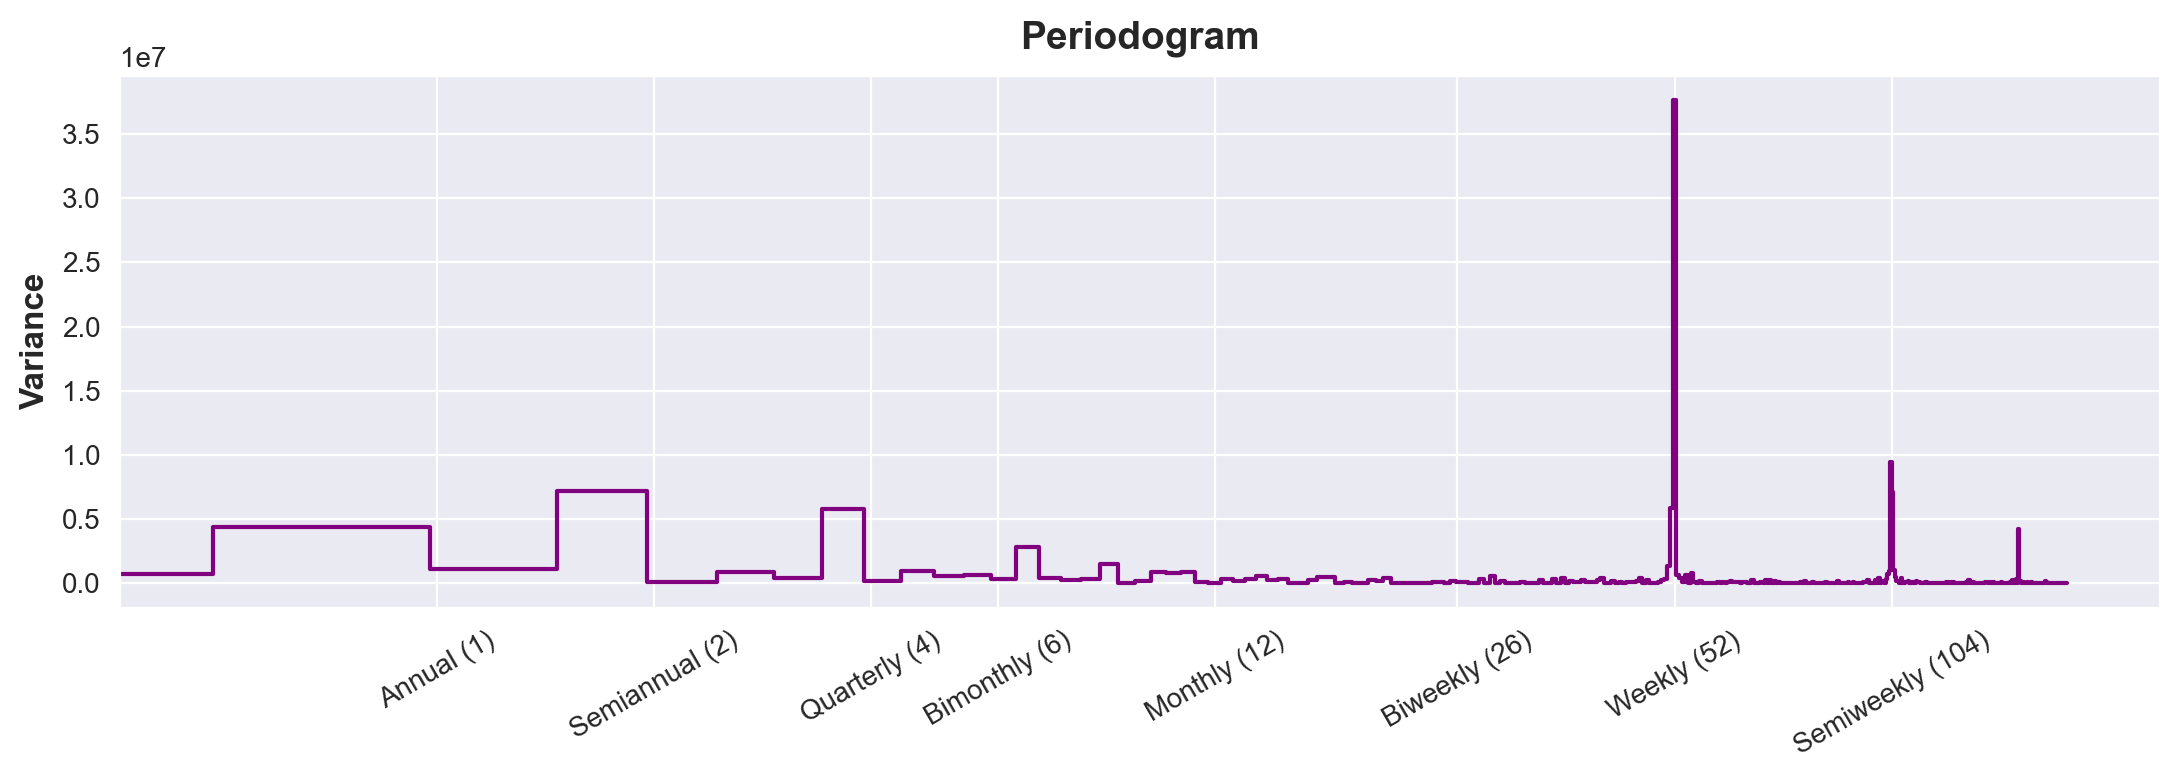

In [9]:
plot_periodogram(tunnel_copy.NumVehicles)

- Seasonal Plot and Periodgram show a strong weekly seasonality, with respect to an annual one.
- Use Seasonal Indicators for the weekly seasonality
- The periodogram falls off between Bimonthly (6) and Monthly (12) &rarr; Use 10 Fourier pairs

## Feature Engineering

Create our seasonal features using `DeterministicProcess`.
To use two seasonal periods (weekly and annual), we'll need to instantiate one of them as an `additional_term`.

In [14]:
# 10 sin/cos pairs for "YE"arly seasonality
fourier = CalendarFourier(freq="YE", order=10)

In [15]:
# Define the deterministic process
seasonality_deterministic_process = DeterministicProcess(
    index=tunnel_copy.index,
    constant=True, # y_intercept
    order=1, # Trend seems linear from the Seasonal Plot (year/dayofyear)
    seasonal=True, # Weekly Seasonal Indicators
    additional_terms=[fourier], # Annual Fourier Seasonality
    drop=True # Avoid collinearity
)

In [16]:
# Create the features
X = seasonality_deterministic_process.in_sample()

## Model Training

In [17]:
# Define label
y = tunnel_copy["NumVehicles"]

# Instance model without intercept fit
model = LinearRegression(fit_intercept=False)

# Fit
model.fit(X, y)

LinearRegression(fit_intercept=False)

## Future Predictions

In [18]:
# Compute predictions
y_pred = pd.Series(model.predict(X), index=X.index)

# Compute future time steps 90 days
X_future = seasonality_deterministic_process.out_of_sample(90)

# Compute future predictions
y_future = pd.Series(model.predict(X_future), index=X_future.index)

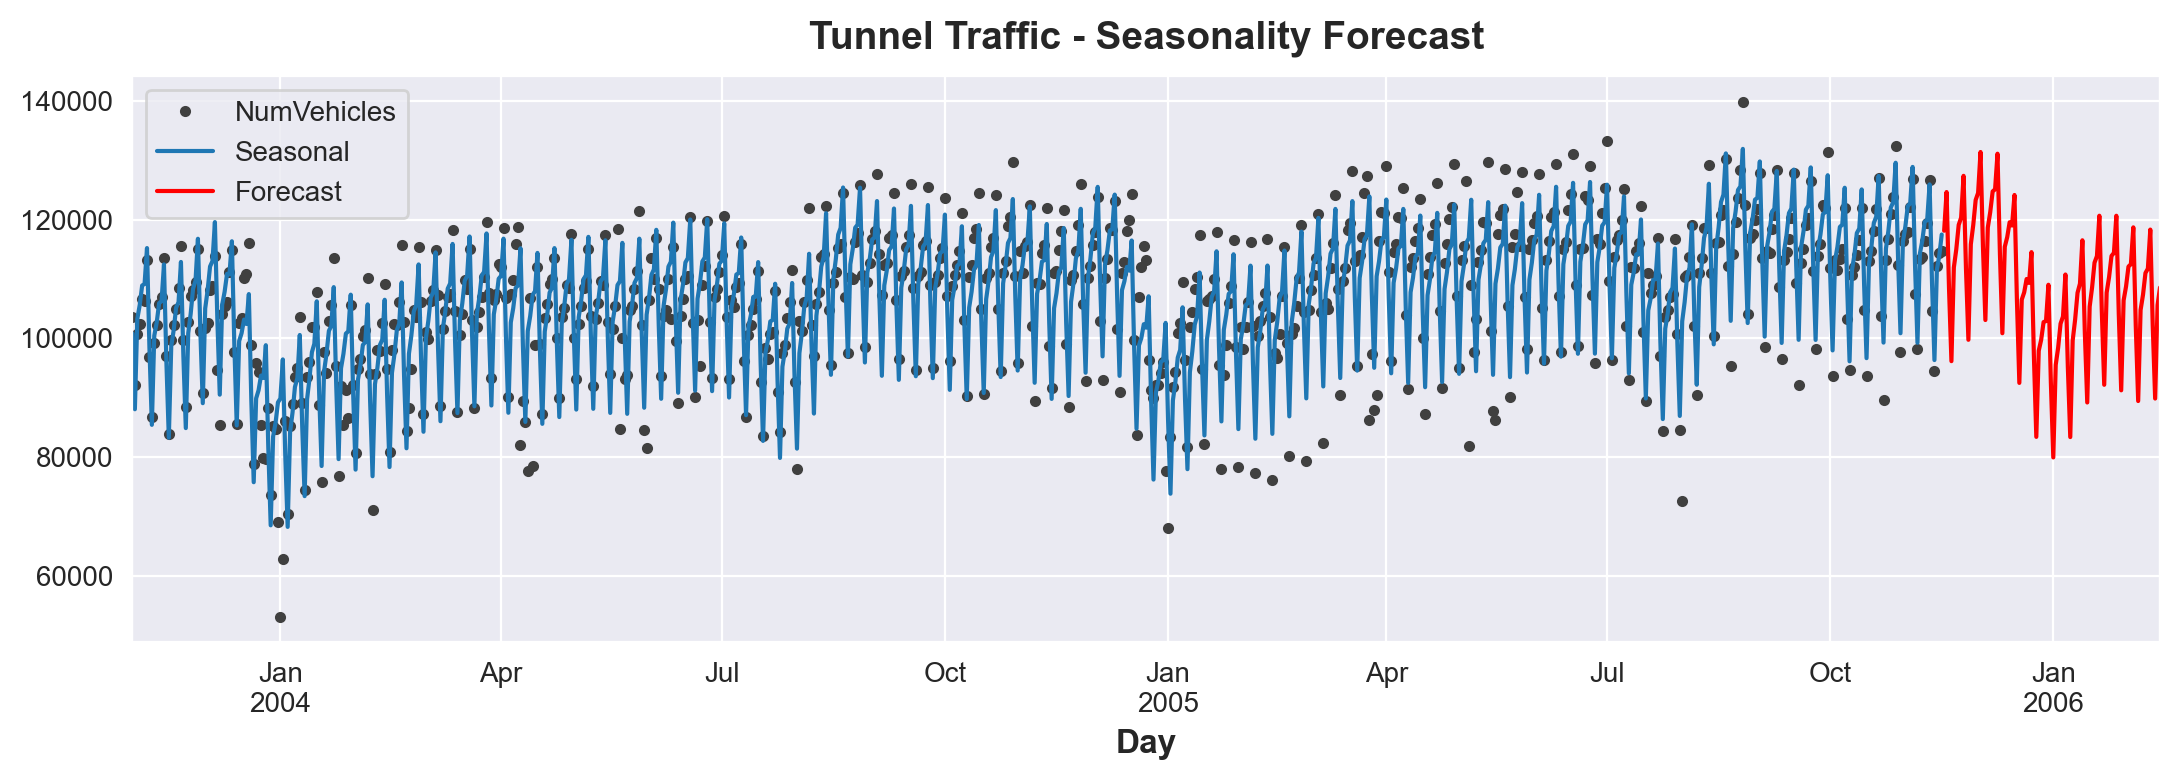

In [24]:
# Plot
ax = y.plot(color='0.25', style='.', title="Tunnel Traffic - Seasonality Forecast")
ax = y_pred.plot(label='Seasonal')
ax = y_future.plot(color='red', label='Forecast')
ax.legend()